<a href="https://colab.research.google.com/github/rafiechautie/Autism-detector-for-children/blob/main/Machine-Learning/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import os
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import vgg16, vgg19, efficientnet, mobilenet, inception_v3
from tensorflow.keras import Model
from PIL import Image 
import matplotlib.image as mpimg

# Install Kaggle + Import Data


In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d cihan063/autism-image-data

 88% 201M/229M [00:02<00:00, 77.3MB/s]
100% 229M/229M [00:02<00:00, 104MB/s] 


In [ ]:
! mkdir autism

In [ ]:
! unzip -qq autism-image-data.zip -d autism
!ls autism

AutismDataset


In [ ]:
!ls autism/AutismDataset

consolidated  test  train  valid


In [ ]:
#Base
file_dir ='autism/AutismDataset/consolidated'

# Autist and Non-Autist
autist_dir = os.path.join(file_dir, 'Autistic')
nonautist_dir = os.path.join(file_dir, 'Non_Autistic')

print('total autist:', len(os.listdir(autist_dir)))
print('total nonautist:', len(os.listdir(nonautist_dir)))

total autist: 1470
total nonautist: 1470


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio(file_dir, '/content/autism/', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 2940 files [00:00, 5009.98 files/s]


In [ ]:
train_dir ='autism/train/'
val_dir = 'autism/val'
test_dir = 'autism/test'

# Train Dir
train_autist_dir = os.path.join(train_dir, 'Autistic')
train_nonautist_dir = os.path.join(train_dir, 'Non_Autistic')

print('total training autist:', len(os.listdir(train_autist_dir)))
print('total training nonautist:', len(os.listdir(train_nonautist_dir)))

# Val Dir
val_autist_dir = os.path.join(val_dir, 'Autistic')
val_nonautist_dir = os.path.join(val_dir, 'Non_Autistic')
print('total val autist:', len(os.listdir(val_autist_dir)))
print('total val nonautist:', len(os.listdir(val_nonautist_dir)))

total training autist: 1176
total training nonautist: 1176
total val autist: 147
total val nonautist: 147


# Pre-processing Image

In [ ]:
list_autism = os.listdir(train_dir)

In [ ]:
jumlah = 0

for x in list_autism:
  dc = os.path.join(train_dir, x)
  y = len(os.listdir(dc))
  print(x + ':', y)
  jumlah = jumlah + y

  namagbr = os.listdir(dc)
  for z in range(4):
    gbr_dc = os.path.join(dc, namagbr[z])
    gbr = Image.open(gbr_dc)
    print('ukuran', gbr.size)  
  print('/////////////////')

print('\nTotal Gambar :', jumlah)

Autistic: 1176
ukuran (568, 766)
ukuran (270, 339)
ukuran (619, 613)
ukuran (297, 369)
/////////////////
Non_Autistic: 1176
ukuran (890, 814)
ukuran (484, 512)
ukuran (225, 231)
ukuran (335, 335)
/////////////////

Total Gambar : 2352


Autistic


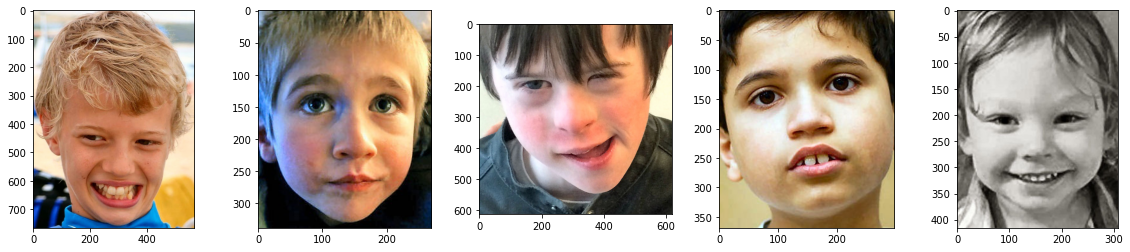

Non_Autistic


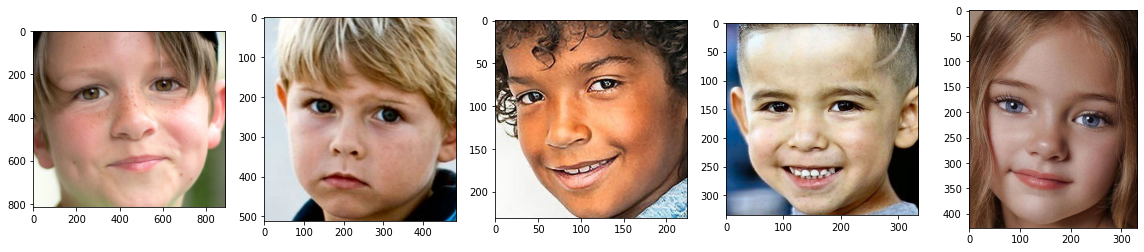

In [ ]:
# check images class
for item in list_autism:
  print(item)
  class_dir = os.path.join(train_dir,item)
  class_img = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, gbr_dc in enumerate(class_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, gbr_dc))
    plt.imshow(img)
  plt.show()

# Augmentation Image

In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )

val_datagen = ImageDataGenerator(
    rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=235,
)

val_generator = val_datagen.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10,
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


# Modelling

## Self-Modelling

In [ ]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(3,3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , patience= 5, restore_best_weights=True)
mc = ModelCheckpoint(filepath="Model1_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history1 = model1.fit(
    train_generator, epochs=15, verbose=2, callbacks=[es, mc], 
    validation_data=val_generator, validation_steps=10) 

Epoch 1/15
11/11 - 54s - loss: 0.6955 - accuracy: 0.5013 - val_loss: 0.6909 - val_accuracy: 0.5300 - 54s/epoch - 5s/step
Epoch 2/15
11/11 - 42s - loss: 0.6942 - accuracy: 0.4915 - val_loss: 0.6967 - val_accuracy: 0.5000 - 42s/epoch - 4s/step
Epoch 3/15
11/11 - 35s - loss: 0.6942 - accuracy: 0.5064 - val_loss: 0.6841 - val_accuracy: 0.5600 - 35s/epoch - 3s/step
Epoch 4/15
11/11 - 36s - loss: 0.6871 - accuracy: 0.5608 - val_loss: 0.7041 - val_accuracy: 0.5600 - 36s/epoch - 3s/step
Epoch 5/15
11/11 - 35s - loss: 0.7007 - accuracy: 0.5149 - val_loss: 0.6746 - val_accuracy: 0.4800 - 35s/epoch - 3s/step
Epoch 6/15
11/11 - 35s - loss: 0.6623 - accuracy: 0.6241 - val_loss: 0.5760 - val_accuracy: 0.7400 - 35s/epoch - 3s/step
Epoch 7/15
11/11 - 35s - loss: 0.6507 - accuracy: 0.6084 - val_loss: 0.6545 - val_accuracy: 0.5900 - 35s/epoch - 3s/step
Epoch 8/15
11/11 - 34s - loss: 0.6615 - accuracy: 0.6003 - val_loss: 0.6356 - val_accuracy: 0.6000 - 34s/epoch - 3s/step
Epoch 9/15
11/11 - 34s - loss: 0

In [ ]:
model1.evaluate(train_generator)
model1.evaluate(val_generator)

30/30 [==============================] - 1s 42ms/step - loss: 0.6076 - accuracy: 0.6837


[0.6075921058654785, 0.6836734414100647]

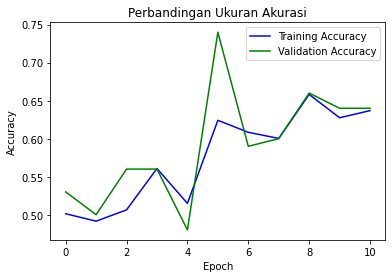

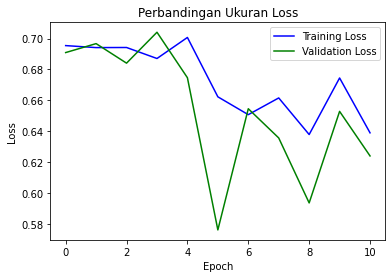

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history1.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(250,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model1.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

## VGG16

In [ ]:
preprocess_input = vgg16.preprocess_input

train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator2 = val_datagen2.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
vgg16_model = vgg16.VGG16(input_shape=(250, 250, 3), include_top=False)

for layer in vgg16_model.layers:
  layer.trainable = False
vgg16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                              

In [ ]:
last_layer = vgg16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [ ]:
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)                
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(vgg16_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc2 = ModelCheckpoint(filepath="Model2_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history2 = model2.fit(
    train_generator2, epochs=15, verbose=2, callbacks=[es, mc2], 
    validation_data=val_generator2, validation_steps=10) 

Epoch 1/15
8/8 - 60s - loss: 16.1689 - accuracy: 0.5238 - val_loss: 5.0421 - val_accuracy: 0.6400 - 60s/epoch - 8s/step
Epoch 2/15
8/8 - 20s - loss: 6.3297 - accuracy: 0.6650 - val_loss: 6.6405 - val_accuracy: 0.6700 - 20s/epoch - 2s/step
Epoch 3/15
8/8 - 20s - loss: 4.7545 - accuracy: 0.6964 - val_loss: 5.1562 - val_accuracy: 0.6700 - 20s/epoch - 2s/step
Epoch 4/15
8/8 - 20s - loss: 2.6390 - accuracy: 0.7466 - val_loss: 2.9730 - val_accuracy: 0.7800 - 20s/epoch - 2s/step
Epoch 5/15
8/8 - 20s - loss: 1.7859 - accuracy: 0.7589 - val_loss: 2.5066 - val_accuracy: 0.7500 - 20s/epoch - 2s/step
Epoch 6/15
8/8 - 19s - loss: 1.2360 - accuracy: 0.7878 - val_loss: 2.7743 - val_accuracy: 0.7400 - 19s/epoch - 2s/step
Epoch 7/15
8/8 - 20s - loss: 0.8572 - accuracy: 0.8189 - val_loss: 2.2970 - val_accuracy: 0.7100 - 20s/epoch - 2s/step
Epoch 8/15
8/8 - 20s - loss: 0.6128 - accuracy: 0.8444 - val_loss: 2.1151 - val_accuracy: 0.7000 - 20s/epoch - 2s/step
Epoch 9/15
8/8 - 20s - loss: 0.4312 - accuracy:

In [ ]:
model2.evaluate(train_generator2)
model2.evaluate(val_generator2)

30/30 [==============================] - 4s 121ms/step - loss: 3.6793 - accuracy: 0.6905


[3.6793134212493896, 0.6904761791229248]

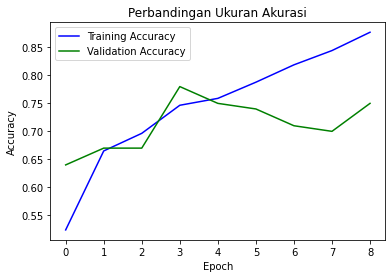

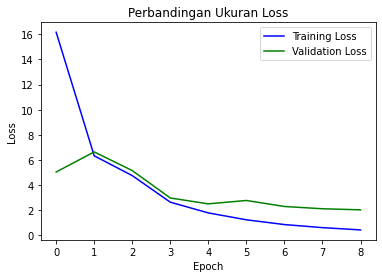

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history2.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history2.history['loss'], label='Training Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

##VGG19

In [ ]:
preprocess_input2 = vgg19.preprocess_input

train_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)
val_datagen3 = ImageDataGenerator(preprocessing_function=preprocess_input2)

train_generator3 = train_datagen3.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator3 = val_datagen3.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
vgg19_model = vgg19.VGG19(input_shape=(250, 250, 3), include_top=False)

for layer in vgg19_model.layers:
  layer.trainable = False
vgg19_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                              

In [ ]:
last_layer2 = vgg19_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer2.output_shape)
last_output2 = last_layer2.output

last layer output shape:  (None, 7, 7, 512)


In [ ]:
x2 = tf.keras.layers.GlobalMaxPooling2D()(last_output2)
x2 = tf.keras.layers.Flatten()(x2)
x2 = tf.keras.layers.Dense(512, activation='relu')(x2)                
x2 = tf.keras.layers.Dense(1, activation='sigmoid')(x2)           

# Append the dense network to the base model
model3 = Model(vgg19_model.input, x2)     

# Print the model summary. See your dense network connected at the end.
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [ ]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc3 = ModelCheckpoint(filepath="Model3_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history3 = model3.fit(
    train_generator3, epochs=15, verbose=2, callbacks=[es, mc3], 
    validation_data=val_generator3, validation_steps=10) 

Epoch 1/15
8/8 - 25s - loss: 13.7169 - accuracy: 0.5417 - val_loss: 3.6115 - val_accuracy: 0.6900 - 25s/epoch - 3s/step
Epoch 2/15
8/8 - 23s - loss: 5.5209 - accuracy: 0.6701 - val_loss: 6.1382 - val_accuracy: 0.6500 - 23s/epoch - 3s/step
Epoch 3/15
8/8 - 23s - loss: 3.8931 - accuracy: 0.6909 - val_loss: 4.3046 - val_accuracy: 0.7200 - 23s/epoch - 3s/step
Epoch 4/15
8/8 - 24s - loss: 2.1419 - accuracy: 0.7500 - val_loss: 2.7806 - val_accuracy: 0.7400 - 24s/epoch - 3s/step
Epoch 5/15
8/8 - 23s - loss: 1.3851 - accuracy: 0.7700 - val_loss: 2.4529 - val_accuracy: 0.7100 - 23s/epoch - 3s/step
Epoch 6/15
8/8 - 23s - loss: 0.9677 - accuracy: 0.8014 - val_loss: 1.9970 - val_accuracy: 0.6700 - 23s/epoch - 3s/step
Epoch 7/15
8/8 - 24s - loss: 0.7435 - accuracy: 0.8248 - val_loss: 1.7294 - val_accuracy: 0.7600 - 24s/epoch - 3s/step
Epoch 8/15
8/8 - 23s - loss: 0.5131 - accuracy: 0.8712 - val_loss: 1.6242 - val_accuracy: 0.7400 - 23s/epoch - 3s/step
Epoch 9/15
8/8 - 23s - loss: 0.3651 - accuracy:

In [ ]:
model3.evaluate(train_generator3)
model3.evaluate(val_generator3)

30/30 [==============================] - 3s 107ms/step - loss: 1.5175 - accuracy: 0.7075


[1.5174942016601562, 0.7074829936027527]

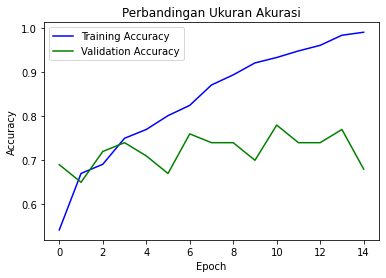

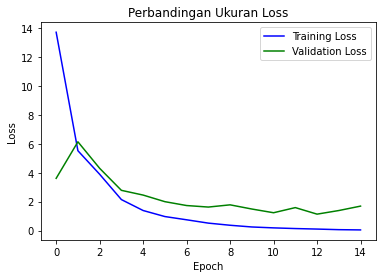

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history3.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history3.history['loss'], label='Training Loss', color='blue')
plt.plot(history3.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Efficient Net B0

In [ ]:
preprocess_input3 = efficientnet.preprocess_input

train_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)
val_datagen4 = ImageDataGenerator(preprocessing_function=preprocess_input3)

train_generator4 = train_datagen4.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator4 = val_datagen4.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
en_model = efficientnet.EfficientNetB0(input_shape=(250, 250, 3), include_top=False)

for layer in en_model.layers:
  layer.trainable = False
en_model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 250, 250, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
last_layer3 = en_model.get_layer('top_conv')
print('last layer output shape: ', last_layer3.output_shape)
last_output3 = last_layer3.output

last layer output shape:  (None, 8, 8, 1280)


In [ ]:
x3 = tf.keras.layers.GlobalMaxPooling2D()(last_output3)
x3 = tf.keras.layers.Flatten()(x3)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)                
x3 = tf.keras.layers.Dense(1, activation='sigmoid')(x3)           

# Append the dense network to the base model
model4 = Model(en_model.input, x3)    

# Print the model summary. See your dense network connected at the end.
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 250, 250, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 251, 251, 3)  0           ['normalization[0][0]']    

In [ ]:
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc4 = ModelCheckpoint(filepath="Model4_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history4 = model4.fit(
    train_generator4, epochs=15, verbose=2, callbacks=[es, mc4], 
    validation_data=val_generator4, validation_steps=10) 

Epoch 1/15
8/8 - 20s - loss: 19.2646 - accuracy: 0.5051 - val_loss: 6.4068 - val_accuracy: 0.5200 - 20s/epoch - 3s/step
Epoch 2/15
8/8 - 10s - loss: 5.0443 - accuracy: 0.5179 - val_loss: 1.4312 - val_accuracy: 0.6000 - 10s/epoch - 1s/step
Epoch 3/15
8/8 - 10s - loss: 1.9468 - accuracy: 0.5446 - val_loss: 2.2539 - val_accuracy: 0.4900 - 10s/epoch - 1s/step
Epoch 4/15
8/8 - 10s - loss: 1.3451 - accuracy: 0.5804 - val_loss: 1.4135 - val_accuracy: 0.5600 - 10s/epoch - 1s/step
Epoch 5/15
8/8 - 10s - loss: 0.8490 - accuracy: 0.6522 - val_loss: 0.5901 - val_accuracy: 0.7600 - 10s/epoch - 1s/step
Epoch 6/15
8/8 - 10s - loss: 0.6617 - accuracy: 0.6918 - val_loss: 0.7145 - val_accuracy: 0.6800 - 10s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.5923 - accuracy: 0.7185 - val_loss: 0.6395 - val_accuracy: 0.6700 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 10s - loss: 0.5564 - accuracy: 0.7198 - val_loss: 0.5182 - val_accuracy: 0.7500 - 10s/epoch - 1s/step
Epoch 9/15
8/8 - 10s - loss: 0.5515 - accuracy:

In [ ]:
model4.evaluate(train_generator4)
model4.evaluate(val_generator4)

30/30 [==============================] - 2s 60ms/step - loss: 0.5556 - accuracy: 0.7143


[0.5555835366249084, 0.7142857313156128]

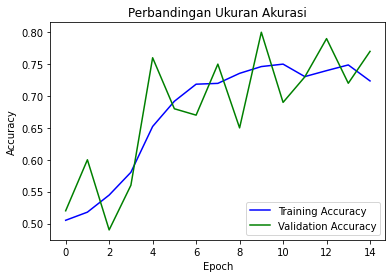

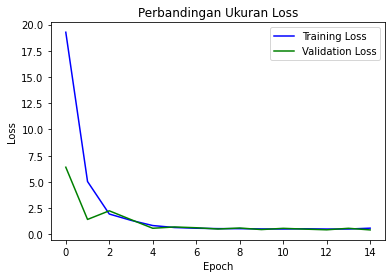

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history4.history['accuracy']))


#Plot training and validation accuracy per epoch
plt.plot(epochs, history4.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history4.history['loss'], label='Training Loss', color='blue')
plt.plot(history4.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Mobile Net

In [ ]:
preprocess_input4 = mobilenet.preprocess_input

train_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)
val_datagen5 = ImageDataGenerator(preprocessing_function=preprocess_input4)

train_generator5 = train_datagen5.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator5 = val_datagen5.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
mn_model = mobilenet.MobileNet(input_shape=(250, 250, 3), include_top=False)

for layer in mn_model.layers:
  layer.trainable = False
mn_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32

In [ ]:
last_layer4 = mn_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer4.output_shape)
last_output4 = last_layer4.output

last layer output shape:  (None, 7, 7, 1024)


In [ ]:
x4 = tf.keras.layers.GlobalMaxPooling2D()(last_output4)
x4 = tf.keras.layers.Flatten()(x4)
x4 = tf.keras.layers.Dense(512, activation='relu')(x4)                
x4 = tf.keras.layers.Dense(1, activation='sigmoid')(x4)           

# Append the dense network to the base model
model5 = Model(mn_model.input, x4)    

# Print the model summary. See your dense network connected at the end.
model5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 125, 125, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 125, 125, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 125, 125, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 125, 125, 32)     128       
 ation)                                                    

In [ ]:
model5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc5 = ModelCheckpoint(filepath="Model5_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history5 = model5.fit(
    train_generator5, epochs=15, verbose=2, callbacks=[es, mc5], 
    validation_data=val_generator5, validation_steps=10)

Epoch 1/15
8/8 - 14s - loss: 5.0868 - accuracy: 0.5306 - val_loss: 1.3805 - val_accuracy: 0.6000 - 14s/epoch - 2s/step
Epoch 2/15
8/8 - 9s - loss: 2.0769 - accuracy: 0.5991 - val_loss: 2.1413 - val_accuracy: 0.5400 - 9s/epoch - 1s/step
Epoch 3/15
8/8 - 9s - loss: 1.2750 - accuracy: 0.6616 - val_loss: 0.8688 - val_accuracy: 0.7000 - 9s/epoch - 1s/step
Epoch 4/15
8/8 - 9s - loss: 0.8935 - accuracy: 0.7032 - val_loss: 0.5589 - val_accuracy: 0.7700 - 9s/epoch - 1s/step
Epoch 5/15
8/8 - 9s - loss: 0.6082 - accuracy: 0.7428 - val_loss: 0.5816 - val_accuracy: 0.7600 - 9s/epoch - 1s/step
Epoch 6/15
8/8 - 9s - loss: 0.5348 - accuracy: 0.7589 - val_loss: 0.5119 - val_accuracy: 0.7600 - 9s/epoch - 1s/step
Epoch 7/15
8/8 - 9s - loss: 0.4855 - accuracy: 0.7696 - val_loss: 0.6841 - val_accuracy: 0.7000 - 9s/epoch - 1s/step
Epoch 8/15
8/8 - 9s - loss: 0.4428 - accuracy: 0.7900 - val_loss: 0.4801 - val_accuracy: 0.7700 - 9s/epoch - 1s/step
Epoch 9/15
8/8 - 9s - loss: 0.4167 - accuracy: 0.8031 - val_lo

In [ ]:
model5.evaluate(train_generator5)
model5.evaluate(val_generator5)

30/30 [==============================] - 2s 51ms/step - loss: 0.5795 - accuracy: 0.7517


[0.5794881582260132, 0.7517006993293762]

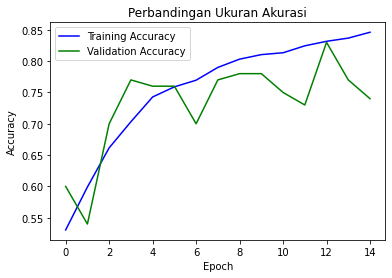

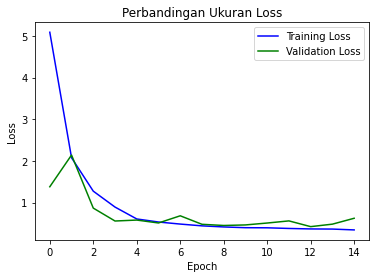

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history5.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history5.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history5.history['loss'], label='Training Loss', color='blue')
plt.plot(history5.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Inception V3

In [ ]:
preprocess_input5 = inception_v3.preprocess_input

train_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)
val_datagen6 = ImageDataGenerator(preprocessing_function=preprocess_input5)

train_generator6 = train_datagen6.flow_from_directory(
	train_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=294
)

val_generator6 = val_datagen6.flow_from_directory(
	val_dir,
	target_size=(250,250),
	class_mode='binary',
  batch_size=10
)

Found 2352 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
inc_model = inception_v3.InceptionV3(input_shape=(250, 250, 3), include_top=False)

for layer in inc_model.layers:
  layer.trainable = False
inc_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 124, 124, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_3[0][0]']               
 alization)           

In [ ]:
last_layer5 = inc_model.get_layer('mixed10')
print('last layer output shape: ', last_layer5.output_shape)
last_output5 = last_layer5.output

last layer output shape:  (None, 6, 6, 2048)


In [ ]:
x5 = tf.keras.layers.GlobalMaxPooling2D()(last_output5)
x5 = tf.keras.layers.Flatten()(x5)
x5 = tf.keras.layers.Dense(512, activation='relu')(x5)                
x5 = tf.keras.layers.Dense(1, activation='sigmoid')(x5)           

# Append the dense network to the base model
model6 = Model(inc_model.input, x5)    

# Print the model summary. See your dense network connected at the end.
model6.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 124, 124, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                           

In [ ]:
model6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc6 = ModelCheckpoint(filepath="Model6_Best.h5", monitor="val_accuracy", save_best_only= True)

In [ ]:
history6 = model6.fit(
    train_generator6, epochs=15, verbose=2, callbacks=[es, mc6], 
    validation_data=val_generator6, validation_steps=10)

Epoch 1/15
8/8 - 24s - loss: 6.2908 - accuracy: 0.5310 - val_loss: 4.4422 - val_accuracy: 0.4400 - 24s/epoch - 3s/step
Epoch 2/15
8/8 - 12s - loss: 1.8293 - accuracy: 0.5238 - val_loss: 1.1266 - val_accuracy: 0.5100 - 12s/epoch - 1s/step
Epoch 3/15
8/8 - 11s - loss: 0.8193 - accuracy: 0.5574 - val_loss: 0.6354 - val_accuracy: 0.6300 - 11s/epoch - 1s/step
Epoch 4/15
8/8 - 11s - loss: 0.6360 - accuracy: 0.6390 - val_loss: 0.6319 - val_accuracy: 0.5900 - 11s/epoch - 1s/step
Epoch 5/15
8/8 - 11s - loss: 0.5854 - accuracy: 0.6952 - val_loss: 0.5658 - val_accuracy: 0.7200 - 11s/epoch - 1s/step
Epoch 6/15
8/8 - 11s - loss: 0.5564 - accuracy: 0.7224 - val_loss: 0.5374 - val_accuracy: 0.7500 - 11s/epoch - 1s/step
Epoch 7/15
8/8 - 10s - loss: 0.5396 - accuracy: 0.7321 - val_loss: 0.6533 - val_accuracy: 0.6400 - 10s/epoch - 1s/step
Epoch 8/15
8/8 - 11s - loss: 0.5266 - accuracy: 0.7402 - val_loss: 0.5501 - val_accuracy: 0.7500 - 11s/epoch - 1s/step
Epoch 9/15
8/8 - 10s - loss: 0.5166 - accuracy: 

In [ ]:
model6.evaluate(train_generator6)
model6.evaluate(val_generator6)

30/30 [==============================] - 2s 78ms/step - loss: 0.5874 - accuracy: 0.6905


[0.5873921513557434, 0.6904761791229248]

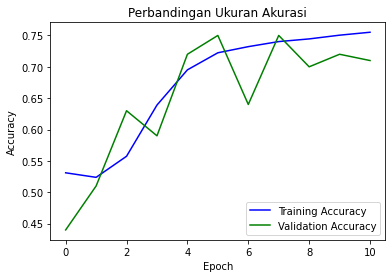

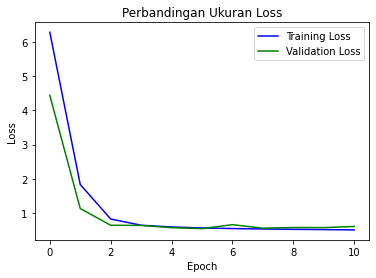

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
epochs = range(len(history6.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history6.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history6.history['loss'], label='Training Loss', color='blue')
plt.plot(history6.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Testing**

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
 
for path in uploaded.keys():
  #dont forget to change target_size
  img = image.load_img(path, target_size=(250,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  
  #remember to change model for testing
  classes = model2.predict(images) # the value is not always 1 and 0 because of probabilities
  threshold = 0.5
  predictions = np.where(classes > threshold, 1,0)
  
if(predictions == 1):
  print('Autistic')
else:
  print('Non_Autistic')

In [ ]:
## change image_width and image_height
import cv2
nrows = 250
ncolumns  = 250

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

In [ ]:
import random
test_imgs = os.listdir(test_dir)
random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

In [ ]:
## change model
pred = model2.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)

In [ ]:
import pandas as pd
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(test["predictions"], saturation=1)

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

In [ ]:
cl_report = classification_report(y_test, predictions)
print(cl_report)

In [ ]:
cn_matrix= confusion_matrix(y_test, predictions)
cn_matrix

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize=(4,4))
for val, i in enumerate(test_imgs[:10]):
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.title(os.path.basename(i) + ' - Prediction: ' +  f"{'Autistic' if predictions[val] == 1 else 'Non-Autistic'}")
    plt.show()

# Deployment